<a href="https://colab.research.google.com/github/Emie18/projetBDIAWEB/blob/main/Proj_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Organisation des données

In [145]:
import pandas  as pd
data = pd.read_csv("/content/gdrive/MyDrive/Projet_IA/export_IA2.csv",delimiter=";")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [146]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54795 entries, 0 to 54794
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                54795 non-null  int64  
 1   Num_Acc                   54795 non-null  int64  
 2   num_veh                   54795 non-null  object 
 3   id_usa                    54795 non-null  float64
 4   date                      54795 non-null  object 
 5   ville                     54795 non-null  object 
 6   id_code_insee             54795 non-null  object 
 7   latitude                  54795 non-null  object 
 8   longitude                 54795 non-null  object 
 9   descr_cat_veh             54795 non-null  object 
 10  descr_agglo               54795 non-null  object 
 11  descr_athmo               54795 non-null  object 
 12  descr_lum                 54795 non-null  object 
 13  descr_etat_surf           54795 non-null  object 
 14  descri

In [147]:
data.shape

(54795, 22)

In [148]:
data['descr_grav'].value_counts()

Indemne               23465
Blessé léger          16793
Blessé hospitalisé    12642
Tué                    1895
Name: descr_grav, dtype: int64

In [149]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(data['descr_athmo'], x="descr_athmo", title="Nombre d'accidents en fonction des conditions athmosphérique", labels ={"descr_athmo" : "conditions athmosphérique"})
fig.show()

In [150]:
accidents_graves = data[data['descr_grav'] == 'Tué']
accidents_graves.head()
fig = px.histogram(accidents_graves['descr_athmo'], x="descr_athmo", title="Nombre d'accidents en fonction des conditions athmosphérique", labels ={"descr_athmo" : "conditions athmosphérique"})
fig.show()

In [151]:
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
def convert_non_numeric(data, columns):
    """
    Convertit les valeurs non numériques des colonnes spécifiées en valeurs entières en utilisant OrdinalEncoder.

    Arguments :
    - data : le dataframe contenant les données
    - columns : une liste ou un tableau contenant les noms des colonnes à convertir

    Retour :
    - Le dataframe avec les colonnes converties
    """

    # Création de l'objet OrdinalEncoder
    enc = OrdinalEncoder()

    for column in columns:
        # Sélection de la colonne à convertir
        column_data = data[[column]]

        # Conversion des valeurs non numériques en utilisant OrdinalEncoder
        encoded_data = enc.fit_transform(column_data)

        # Conversion des valeurs encodées en entiers
        encoded_data = encoded_data.astype(int)

        # Remplacement de la colonne originale par les valeurs encodées entières
        data[[column]] = encoded_data

    return data

In [166]:
# Liste des colonnes à convertir
columns_to_convert = ["descr_agglo", "descr_cat_veh","descr_athmo","descr_lum","descr_etat_surf","id_code_insee","description_intersection","descr_dispo_secu","descr_dispo_secu","descr_grav","ville","descr_motif_traj","descr_type_col"]

# Appel de la fonction pour convertir les colonnes spécifiées
data = convert_non_numeric(data, columns_to_convert)

In [153]:
def convert_column_type(data, column, new_type):
    """
    Convertit le type d'une colonne spécifiée dans un dataframe sans modifier les valeurs.

    Arguments :
    - data : le dataframe contenant les données
    - column : le nom de la colonne à convertir
    - new_type : le nouveau type de données pour la colonne

    Retour :
    - Le dataframe avec le type de colonne converti
    """

    # Remplacement des virgules par des points dans la colonne
    data[column] = data[column].str.replace(',', '.')

    # Conversion du type de la colonne
    data[column] = data[column].astype(new_type)

    return data

In [154]:
data = convert_column_type(data, "latitude",float)
data = convert_column_type(data, "longitude",float)


In [155]:
def convert_dates(data, column):
    """
    Convertit les colonnes spécifiées contenant des valeurs de dates et heures en objets datetime.

    Arguments :
    - data : le dataframe contenant les données
    - columns : une liste ou un tableau contenant les noms des colonnes à convertir

    Retour :
    - Le dataframe avec les colonnes converties en objets datetime
    """ 
    # Conversion des valeurs de dates et heures en objets datetime
    data[column] = pd.to_datetime(data[column])

    return data

In [156]:
data = convert_dates(data, "date")

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54795 entries, 0 to 54794
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                54795 non-null  int64         
 1   Num_Acc                   54795 non-null  int64         
 2   num_veh                   54795 non-null  object        
 3   id_usa                    54795 non-null  float64       
 4   date                      54795 non-null  datetime64[ns]
 5   ville                     54795 non-null  int64         
 6   id_code_insee             54795 non-null  int64         
 7   latitude                  54795 non-null  float64       
 8   longitude                 54795 non-null  float64       
 9   descr_cat_veh             54795 non-null  int64         
 10  descr_agglo               54795 non-null  int64         
 11  descr_athmo               54795 non-null  int64         
 12  descr_lum         

In [168]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib.pyplot as plt


In [159]:
fig = px.scatter_mapbox(data,
                 lat=data.latitude,
                 lon=data.longitude,
                 color = data.descr_grav)
fig.update_layout(
    mapbox=dict(
        style='open-street-map',
        center=dict(lon=2.554071, lat=46.603354),
        zoom=4
    ),
    title=dict(text="Carte des accidents en fonction de leur gravité", x=0.5)
)

fig.show()

##matrice de correlation


In [169]:
corr_matrix = data.corr()
# Affichage de la matrice de corrélation
print(corr_matrix)


                          Unnamed: 0   Num_Acc    id_usa     ville  \
Unnamed: 0                  1.000000  0.216819  0.216802 -0.015425   
Num_Acc                     0.216819  1.000000  0.999997 -0.025239   
id_usa                      0.216802  0.999997  1.000000 -0.025291   
ville                      -0.015425 -0.025239 -0.025291  1.000000   
id_code_insee               0.045283  0.123493  0.123620 -0.052287   
latitude                    0.040765  0.071885  0.072222 -0.151572   
longitude                  -0.014534 -0.002959 -0.002804  0.064653   
descr_cat_veh               0.001139 -0.002823 -0.002756  0.014794   
descr_agglo                -0.019877 -0.026481 -0.026506  0.041520   
descr_athmo                 0.017993  0.069246  0.069278  0.003094   
descr_lum                  -0.063456 -0.043375 -0.043528  0.006933   
descr_etat_surf            -0.037263 -0.041550 -0.041637  0.004819   
description_intersection   -0.068447  0.004271  0.004314 -0.008809   
an_nais             

<ipython-input-169-0fa7c87e746d>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



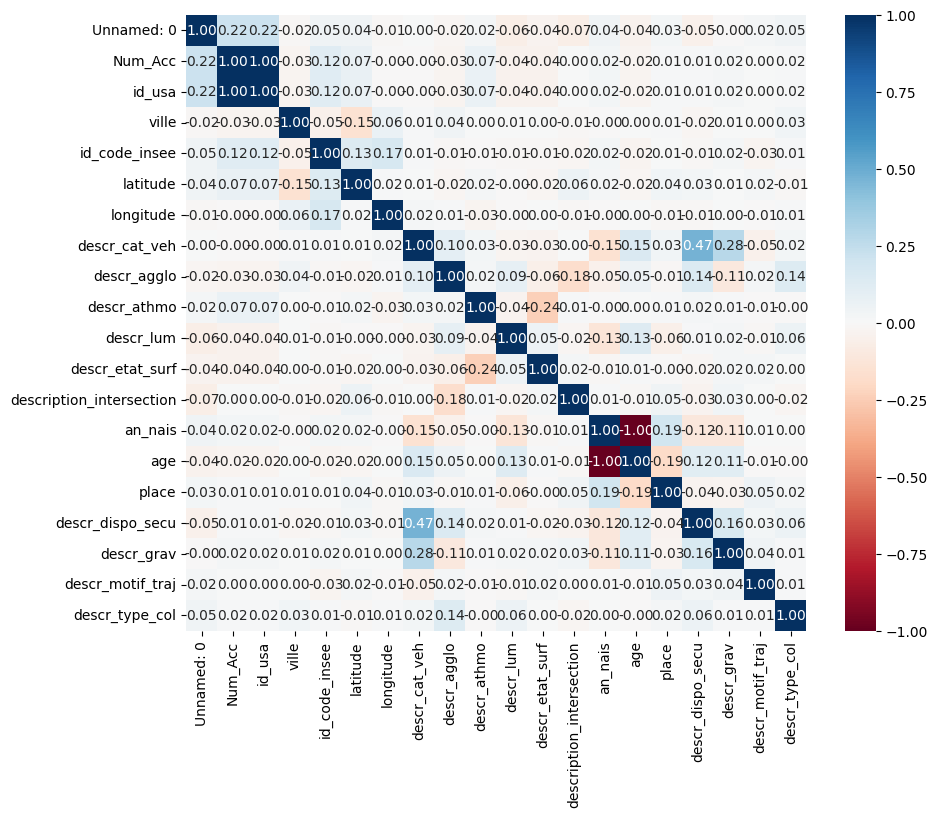

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Configuration de la taille du graphique
plt.figure(figsize=(10, 8))

# Affichage de la matrice de corrélation avec des pourcentages
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="RdBu")

# Affichage du graphique
plt.show()


In [172]:
def keep_selected_columns(data, columns_to_keep):
    """
    Garde uniquement les colonnes spécifiées et supprime les autres colonnes d'un dataframe.

    Arguments :
    - data : le dataframe contenant les données
    - columns_to_keep : une liste ou un tableau contenant les noms des colonnes à conserver

    Retour :
    - Le dataframe avec les colonnes spécifiées conservées
    """

    # Suppression des colonnes qui ne sont pas dans la liste columns_to_keep
    columns_to_drop = set(data.columns) - set(columns_to_keep)
    data = data.drop(columns_to_drop, axis=1)

    return data

In [173]:
columns_to_keep = ['descr_grav', 'id_code_insee', 'latitude', 'longitude', 'descr_cat_veh',
                   'descr_agglo', 'descr_athmo', 'descr_lum', 'descr_etat_surf','date',
                   'descr_type_col']

data = keep_selected_columns(data, columns_to_keep)

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54795 entries, 0 to 54794
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             54795 non-null  datetime64[ns]
 1   id_code_insee    54795 non-null  int64         
 2   latitude         54795 non-null  float64       
 3   longitude        54795 non-null  float64       
 4   descr_cat_veh    54795 non-null  int64         
 5   descr_agglo      54795 non-null  int64         
 6   descr_athmo      54795 non-null  int64         
 7   descr_lum        54795 non-null  int64         
 8   descr_etat_surf  54795 non-null  int64         
 9   descr_grav       54795 non-null  int64         
 10  descr_type_col   54795 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 4.6 MB


<ipython-input-176-fd49c491c3de>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



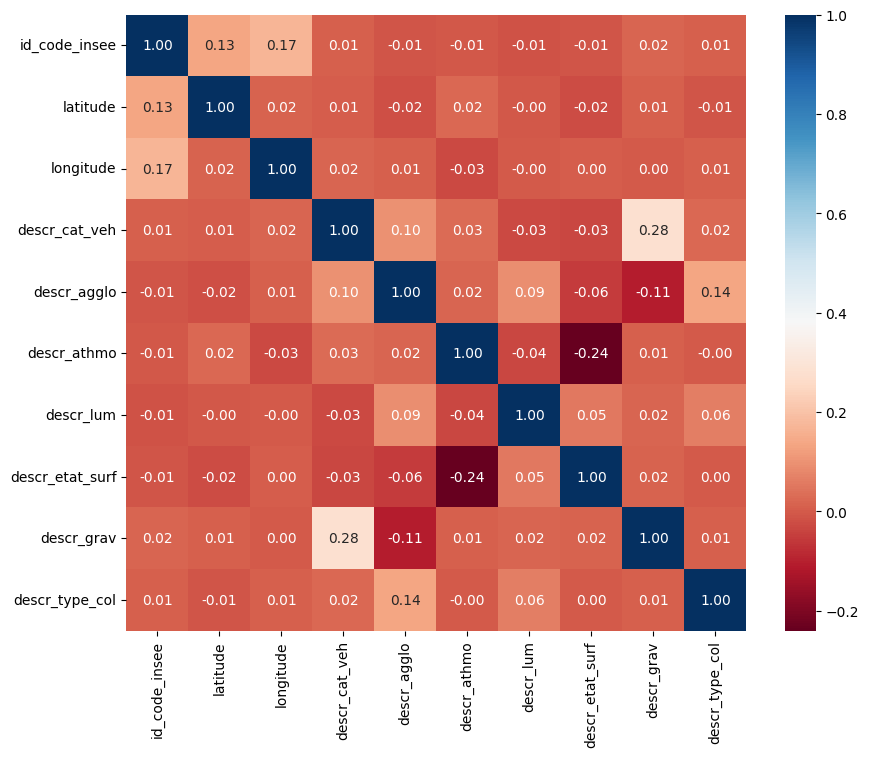

In [176]:
corr_matrix_2 = data.corr()
# Configuration de la taille du graphique
plt.figure(figsize=(10, 8))

# Affichage de la matrice de corrélation avec des pourcentages
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap="RdBu")

# Affichage du graphique
plt.show()

##Culstering